In [1]:
# !pip install yfinance

In [2]:
import requests
import pprint
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

stocks = ['CVX', 'OXY', 'BP', 'XOM', 'EOG', 'TOT', 'DVN', 'RDS-B', 'EQNR', 'COP', 'CL=F']
names = ['Chevron', 'Oxy', 'BP', 'ExxonMobil', 'EOG Resources', 'Total', 'Devon Energy', 'Shell', 'Equinor', 'ConocoPhillips', 'Oil Futures']

In [3]:
def data_retrieve(tickers, names):
    start = datetime.datetime(2000,1,1)
    end = datetime.datetime(2020,12,31)
    data = yf.download(tickers, start=start, end=end)
    data_fix = data.reset_index()
    data_fix.insert(0,'Name', names)
    data_fix.insert(1,'Ticker', tickers)
    return data_fix

In [4]:
master_df = data_retrieve(stocks[0], names[0])

[*********************100%***********************]  1 of 1 completed


In [5]:
stocks = ['OXY', 'BP', 'XOM', 'EOG', 'TOT', 'DVN', 'RDS-B', 'EQNR', 'COP', 'CL=F']
names = ['Oxy', 'BP', 'ExxonMobil', 'EOG Resources', 'Total', 'Devon Energy', 'Shell', 'Equinor', 'ConocoPhillips', 'Oil Futures']
for stock, name in zip(stocks, names):
    add_data = data_retrieve(stock, name)
    master_df = master_df.append(add_data, ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
master_df

,Name,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,Chevron,CVX,2000-01-03,42.937500,42.937500,41.281250,41.812500,19.360474,4387600.0
1,Chevron,CVX,2000-01-04,41.468750,42.062500,41.250000,41.812500,19.360474,3702400.0
2,Chevron,CVX,2000-01-05,41.531250,43.281250,41.531250,42.562500,19.707745,5567600.0
3,Chevron,CVX,2000-01-06,42.656250,44.593750,42.656250,44.375000,20.546988,4353400.0
4,Chevron,CVX,2000-01-07,45.000000,45.437500,44.500000,45.156250,20.908724,4487400.0
...,...,...,...,...,...,...,...,...,...
57539,Oil Futures,CL=F,2020-12-23,46.790001,48.500000,46.160000,48.119999,48.119999,344306.0
57540,Oil Futures,CL=F,2020-12-28,48.230000,48.959999,47.500000,47.619999,47.619999,238462.0
57541,Oil Futures,CL=F,2020-12-29,47.720001,48.349998,47.680000,48.000000,48.000000,213778.0
57542,Oil Futures,CL=F,2020-12-30,48.130001,48.660000,47.610001,48.400002,48.400002,266957.0


In [7]:
#master_df = master_df[['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
#master_df

In [8]:
#stocks = ['OXY', 'BP', 'XOM', 'EOG', 'TOT', 'DVN', 'RDS-B', 'EQNR', 'COP', 'CL=F']
cvx_df = master_df[master_df['Ticker'] == 'CVX']
oxy_df = master_df[master_df['Ticker'] == 'OXY']
bp_df = master_df[master_df['Ticker'] == 'BP']
xom_df = master_df[master_df['Ticker'] == 'XOM']
shell_df = master_df[master_df['Ticker'] == 'RDS-B']
oil_df = master_df[master_df['Ticker'] == 'CL=F']

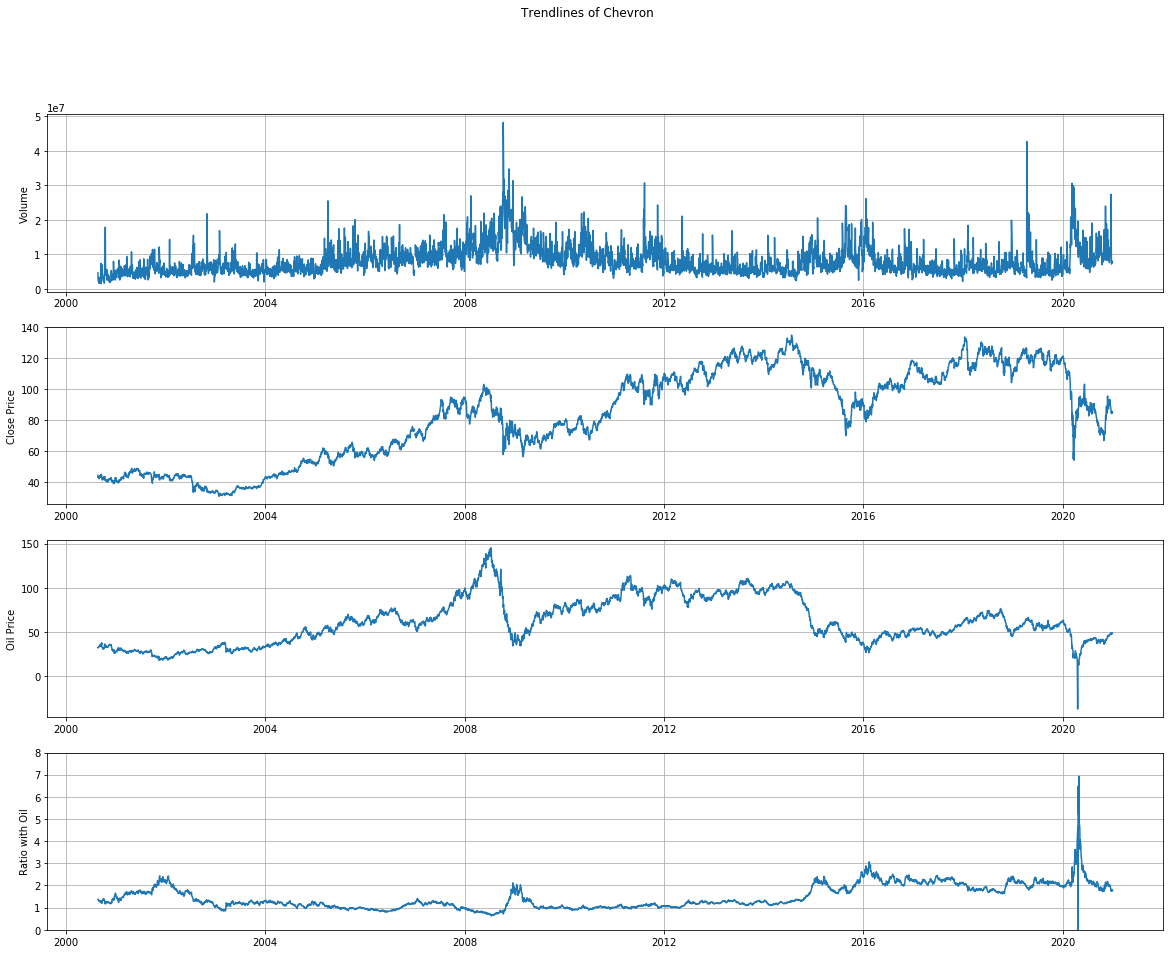

In [17]:
cvx_merge_df = pd.merge(left =oil_df, right=cvx_df, how='left', left_on ='Date', right_on='Date')

cvx_ratio_open = []
for i,j in zip(cvx_merge_df['Open_y'],cvx_merge_df['Open_x']):
    cvx_ratio_open.append(i/j) 

cvx_ratio_close = []
for i,j in zip(cvx_merge_df['Open_y'],cvx_merge_df['Open_x']):
    cvx_ratio_close.append(i/j) 
    
fig, axs = plt.subplots(4, figsize=(20,15))
fig.suptitle('Trendlines of Chevron')
axs[0].plot(cvx_merge_df['Date'], cvx_merge_df['Volume_y'])
axs[0].grid()
axs[0].set_ylabel('Volume')
axs[1].plot(cvx_merge_df['Date'], cvx_merge_df['Close_y'])
axs[1].grid()
axs[1].set_ylabel('Close Price')
axs[2].plot(cvx_merge_df['Date'], cvx_merge_df['Close_x'])
axs[2].grid()
axs[2].set_ylabel('Oil Price')
axs[3].plot(cvx_merge_df['Date'], cvx_ratio_close)
axs[3].grid()
axs[3].set_ylabel('Ratio with Oil')
axs[3].set_ylim([0,8])
plt.show()

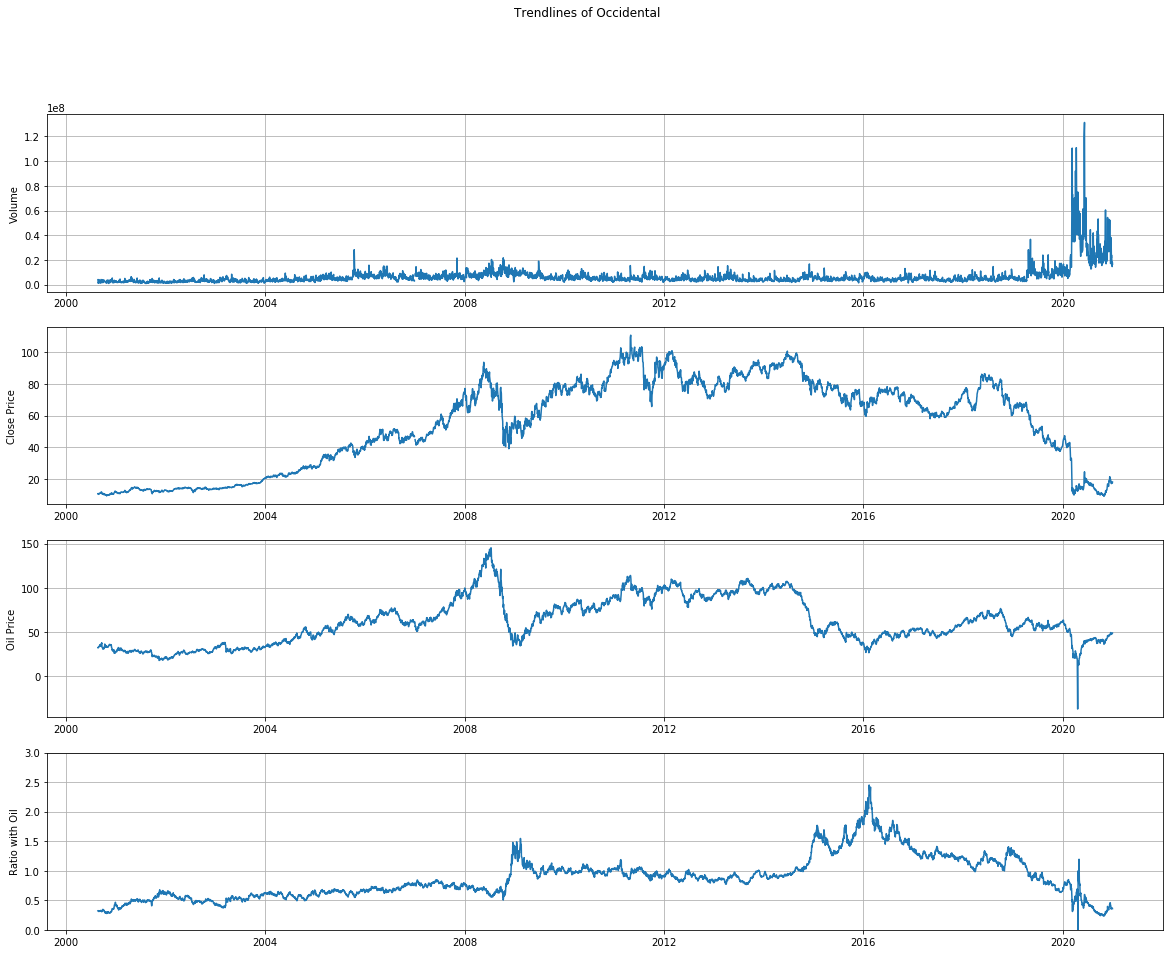

In [18]:
oxy_merge_df = pd.merge(left =oil_df, right=oxy_df, how='left', left_on ='Date', right_on='Date')

oxy_ratio_open = []
for i,j in zip(oxy_merge_df['Open_y'],oxy_merge_df['Open_x']):
    oxy_ratio_open.append(i/j) 

oxy_ratio_close = []
for i,j in zip(oxy_merge_df['Open_y'],oxy_merge_df['Open_x']):
    oxy_ratio_close.append(i/j) 
    
fig, axs = plt.subplots(4, figsize=(20,15))
fig.suptitle('Trendlines of Occidental')
axs[0].plot(oxy_merge_df['Date'], oxy_merge_df['Volume_y'])
axs[0].grid()
axs[0].set_ylabel('Volume')
axs[1].plot(oxy_merge_df['Date'], oxy_merge_df['Close_y'])
axs[1].grid()
axs[1].set_ylabel('Close Price')
axs[2].plot(oxy_merge_df['Date'], oxy_merge_df['Close_x'])
axs[2].grid()
axs[2].set_ylabel('Oil Price')
axs[3].plot(oxy_merge_df['Date'], oxy_ratio_close)
axs[3].grid()
axs[3].set_ylabel('Ratio with Oil')
axs[3].set_ylim([0,3])
plt.show()

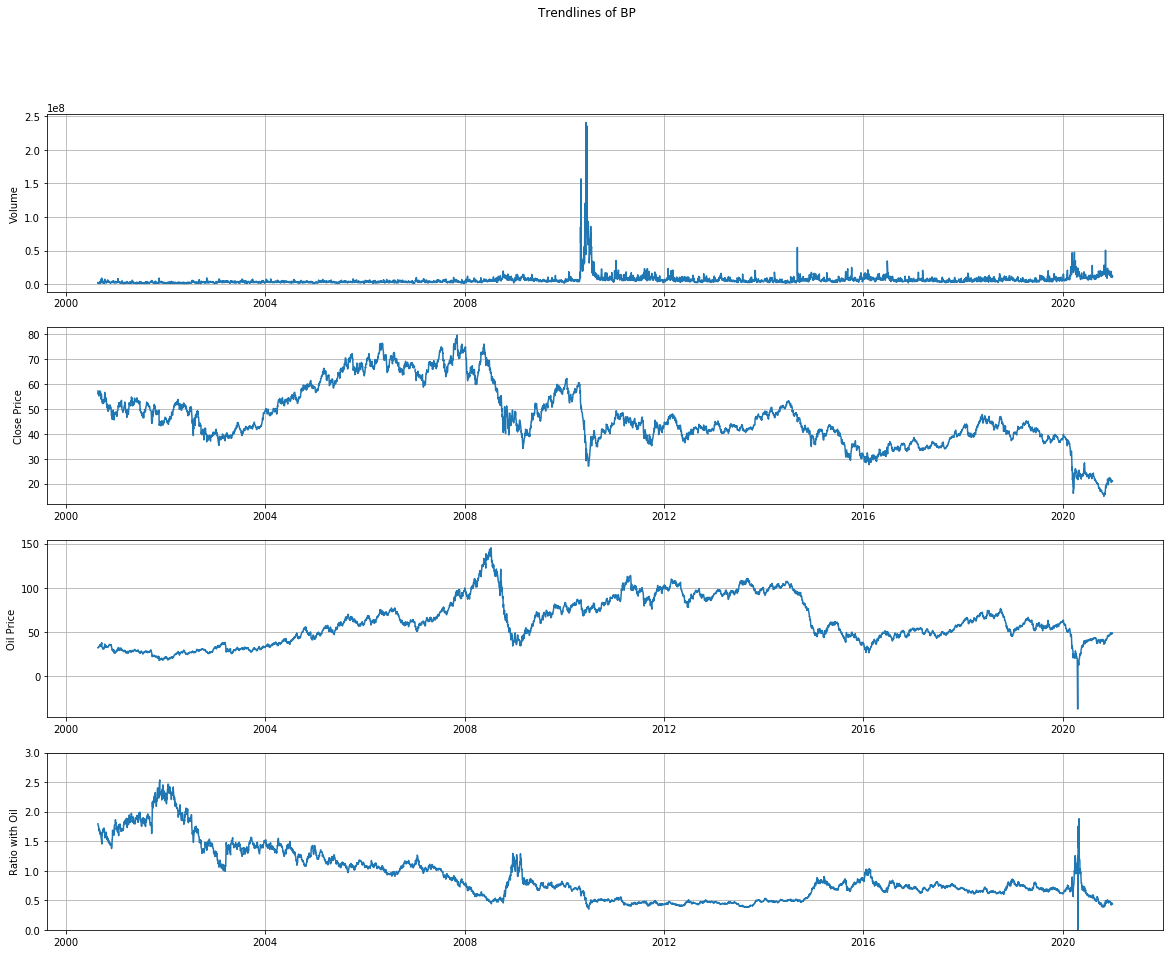

In [20]:
bp_merge_df = pd.merge(left =oil_df, right=bp_df, how='left', left_on ='Date', right_on='Date')

bp_ratio_open = []
for i,j in zip(bp_merge_df['Open_y'],bp_merge_df['Open_x']):
    oxy_ratio_open.append(i/j) 

bp_ratio_close = []
for i,j in zip(bp_merge_df['Open_y'],bp_merge_df['Open_x']):
    bp_ratio_close.append(i/j) 
    
fig, axs = plt.subplots(4, figsize=(20,15))
fig.suptitle('Trendlines of BP')
axs[0].plot(bp_merge_df['Date'], bp_merge_df['Volume_y'])
axs[0].grid()
axs[0].set_ylabel('Volume')
axs[1].plot(bp_merge_df['Date'], bp_merge_df['Close_y'])
axs[1].grid()
axs[1].set_ylabel('Close Price')
axs[2].plot(bp_merge_df['Date'], bp_merge_df['Close_x'])
axs[2].grid()
axs[2].set_ylabel('Oil Price')
axs[3].plot(bp_merge_df['Date'], bp_ratio_close)
axs[3].grid()
axs[3].set_ylabel('Ratio with Oil')
axs[3].set_ylim([0,3])
plt.show()

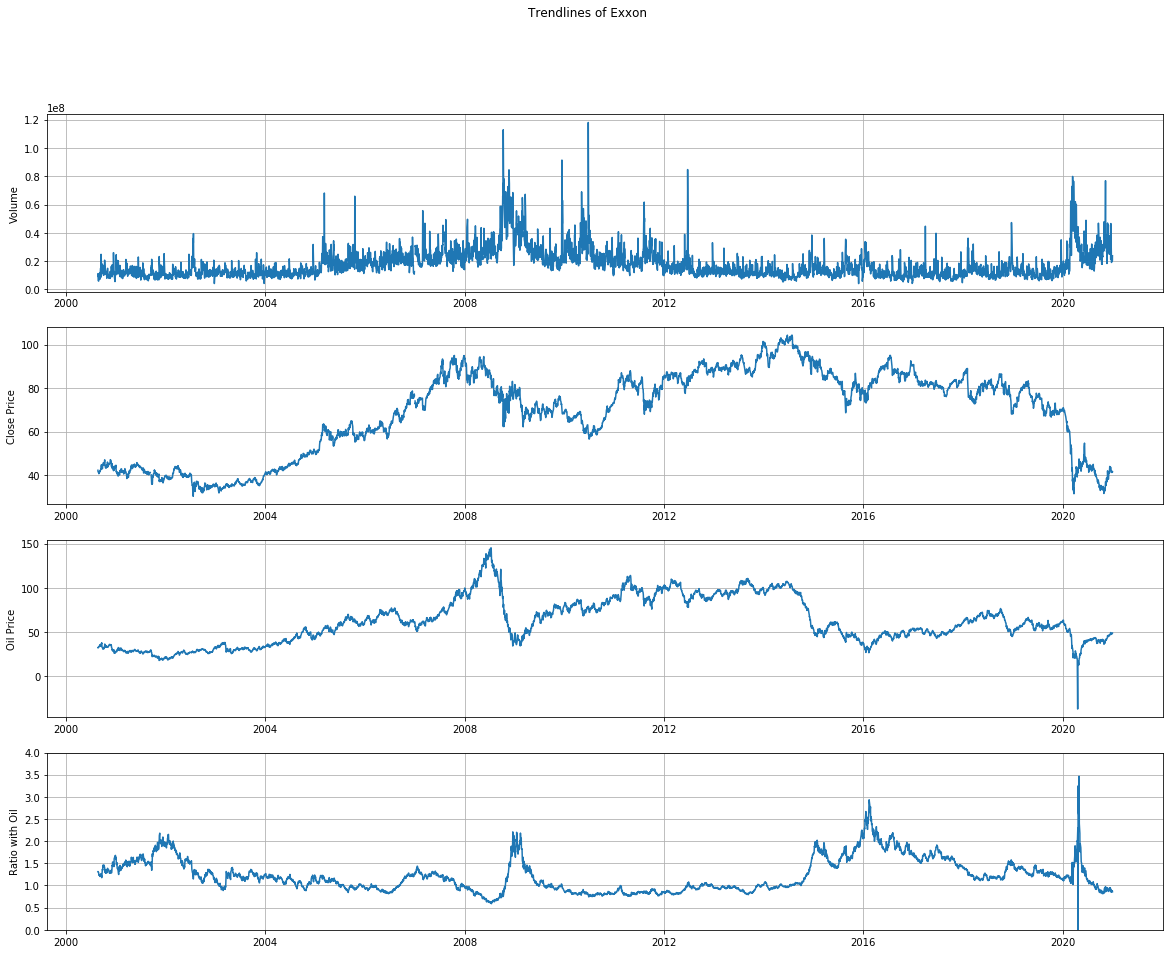

In [21]:
xom_merge_df = pd.merge(left =oil_df, right=xom_df, how='left', left_on ='Date', right_on='Date')

xom_ratio_open = []
for i,j in zip(xom_merge_df['Open_y'],xom_merge_df['Open_x']):
    xom_ratio_open.append(i/j) 

xom_ratio_close = []
for i,j in zip(xom_merge_df['Open_y'],xom_merge_df['Open_x']):
    xom_ratio_close.append(i/j) 
    
fig, axs = plt.subplots(4, figsize=(20,15))
fig.suptitle('Trendlines of Exxon')
axs[0].plot(xom_merge_df['Date'], xom_merge_df['Volume_y'])
axs[0].grid()
axs[0].set_ylabel('Volume')
axs[1].plot(xom_merge_df['Date'], xom_merge_df['Close_y'])
axs[1].grid()
axs[1].set_ylabel('Close Price')
axs[2].plot(xom_merge_df['Date'], xom_merge_df['Close_x'])
axs[2].grid()
axs[2].set_ylabel('Oil Price')
axs[3].plot(xom_merge_df['Date'], xom_ratio_close)
axs[3].grid()
axs[3].set_ylabel('Ratio with Oil')
axs[3].set_ylim([0,4])
plt.show()

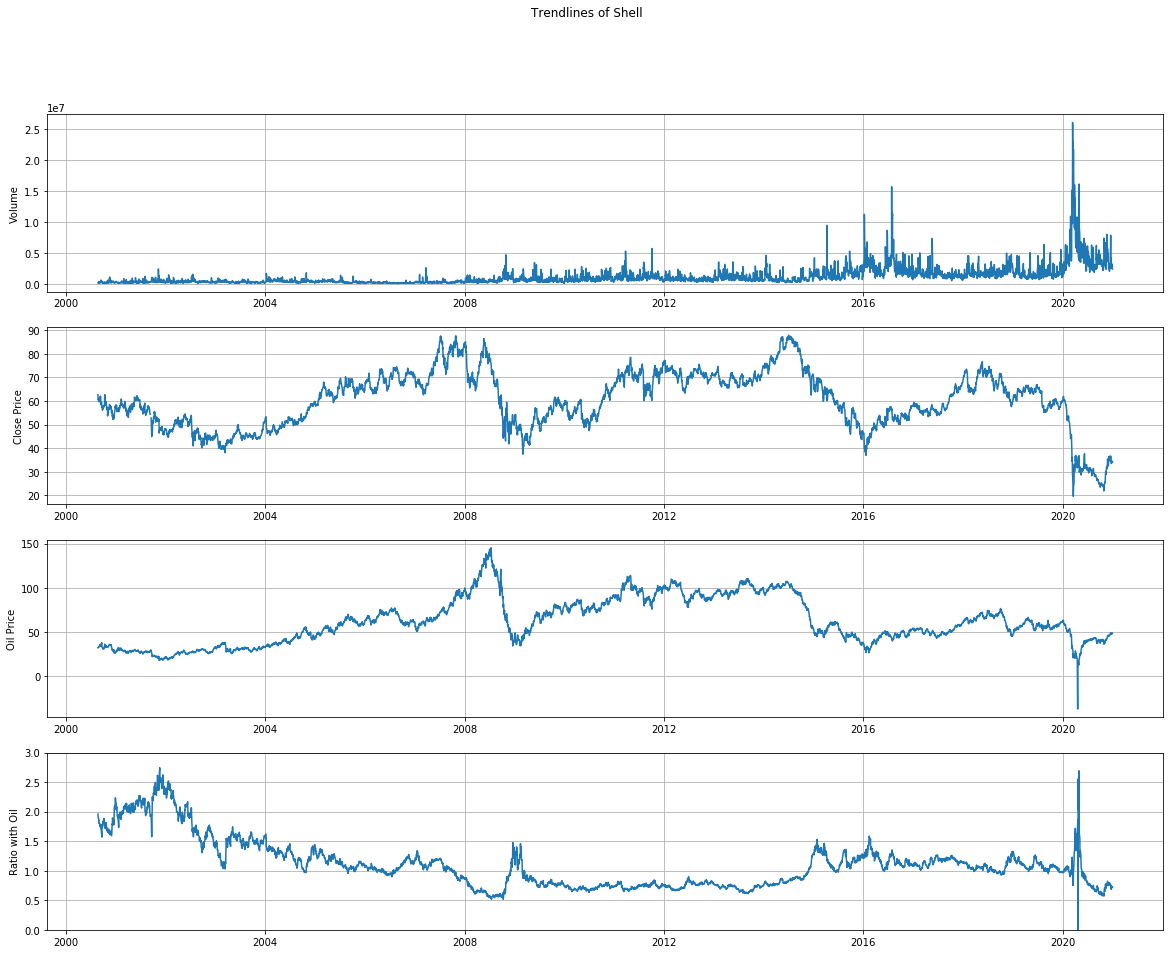

In [23]:
shell_merge_df = pd.merge(left =oil_df, right=shell_df, how='left', left_on ='Date', right_on='Date')

shell_ratio_open = []
for i,j in zip(shell_merge_df['Open_y'],shell_merge_df['Open_x']):
    xom_ratio_open.append(i/j) 

shell_ratio_close = []
for i,j in zip(shell_merge_df['Open_y'],shell_merge_df['Open_x']):
    shell_ratio_close.append(i/j) 
    
fig, axs = plt.subplots(4, figsize=(20,15))
fig.suptitle('Trendlines of Shell')
axs[0].plot(shell_merge_df['Date'], shell_merge_df['Volume_y'])
axs[0].grid()
axs[0].set_ylabel('Volume')
axs[1].plot(shell_merge_df['Date'], shell_merge_df['Close_y'])
axs[1].grid()
axs[1].set_ylabel('Close Price')
axs[2].plot(shell_merge_df['Date'], shell_merge_df['Close_x'])
axs[2].grid()
axs[2].set_ylabel('Oil Price')
axs[3].plot(shell_merge_df['Date'], shell_ratio_close)
axs[3].grid()
axs[3].set_ylabel('Ratio with Oil')
axs[3].set_ylim([0,3])
plt.show()